In [243]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tools import *

In [245]:
root_calib_path = os.getcwd()+"/datasets/data_week_%d/calibration/%d/"
root_skydip_path = os.getcwd()+"/datasets/data_week_%d/sky_dip/%d/"

In [246]:
def calib_files(week, trial):
    path = root_calib_path % (week, trial)
    files = []
    for file in os.listdir(path):
        files.append(path+file)
    return files

def skydip_files(week, trial):
    path = root_skydip_path % (week, trial)
    files = []
    for file in os.listdir(path):
        files.append(path+file)
    return files

In [247]:
datasets = {
    "calibration" : {
        "files"  : [
            calib_files(week=2, trial=5),   # before dip
            calib_files(week=2, trial=6)    # after dip
        ], 
        "data"   : [],
        "map"    : []
    },
    "skydip"     : {
        "files"  : [
            skydip_files(week=2, trial=1), 
            skydip_files(week=2, trial=2),
        ], 
        "data"   : [],
        "map"    : []
    }
}

In [260]:
import time
# for file_list in datasets["calibration"]["files"]:
#     ambient = None
#     liquid_nitro = None
#     for file in file_list:
#         if "ambient" in file:
#             ambient = Data(file)
#         elif "nitro" in file:
#             liquid_nitro = Data(file)
#     datasets["calibration"]["data"].append([ambient, liquid_nitro])

for file_list in datasets["skydip"]["files"]:
    datum = []
    for file in file_list:
        datum.append(Data(file))
    datasets["skydip"]["data"].append(datum) 

In [249]:
datasets["calibration"]

{'files': [['/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/5/corrected_combined.txt',
   '/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/5/ambient_before_dip.txt',
   '/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/5/combined.txt',
   '/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/5/nitro_before_dip.txt',
   '/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/5/corrected_nitro_before_dip.txt',
   '/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/5/reflection_nitro.py'],
  ['/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/data_week_2/calibration/6/ambient_after_dip.txt',
   '/home/abhi/Documents/columbia/spring_20/physics_lab/cmb_experiment/datasets/d

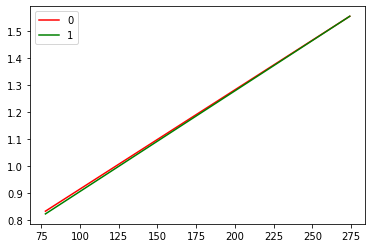

In [15]:
plot_calibration(paired_datasets=datasets["calibration"]["data"])


In [250]:
data_combined_before = Data(root_calib_path % (2, 5) + "/corrected_combined.txt")

skip


No handles with labels found to put in legend.
0.0037148591647070935  +-  0.00042255559924310807
0.5370062879537204  +-  0.08534160448101236


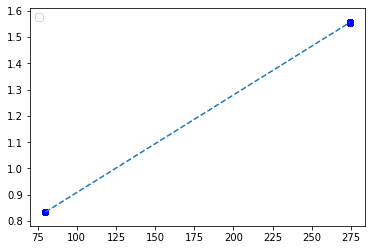

In [251]:
m_before, dm_before, b_before, db_before = plot_data(x=data_combined_before.df.temperature,                                                        y=data_combined_before.df.power)

In [252]:
data_combined_after = Data(root_calib_path % (2, 6) + "/corrected_combined.txt")

skip


No handles with labels found to put in legend.
0.0037668312490898104  +-  0.0003660466935539874
0.5227559317612596  +-  0.06271262089579577


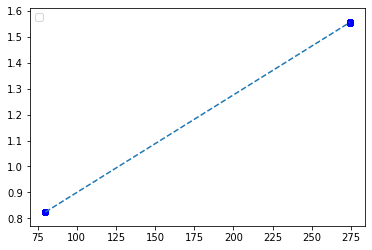

In [253]:
m_after, dm_after, b_after, db_after = plot_data(x=data_combined_after.df.temperature,
                                                 y=data_combined_after.df.power)

In [254]:
m1 = (m_before+m_after)/2.0
dm1 = 1/2.0*((dm_before**2+dm_after**2)**0.5)
b1 = (b_before+b_after)/2.0
db1 = 1/2.0*((db_before**2+db_after**2)**0.5)

In [255]:
m1, dm1, b1, db1

(0.003740845206898452,
 0.0002795279128787986,
 0.52988110985749,
 0.05295295618521535)

In [256]:
f = lambda T: m1*T+b1
f_inverse = lambda P: (P-b1)/m1

In [257]:
f(T=0)

0.52988110985749

In [258]:
f_inverse(P=0.52988)

-0.00029668629110231396

In [261]:
i = 0
data_ = []
for dataset in datasets["skydip"]["data"][0]:
    # print(dataset.df.power.mean(), dataset)
    if dataset.df.power.mean() > 0.51:
        angles = [dataset.angle for _ in range(len(list(dataset.df.power)))]
        dataset.df["angle"] = angles
        data_.append(dataset.df)
        i += len(list(dataset.df.power))
skydip_data = pd.concat(data_)

In [262]:
x = [1.0/np.sin(angle*np.pi/180.0) for angle in list                                    
    (skydip_data.angle)]
y = list(skydip_data.power)

len(x), len(y)

(9500, 9500)

No handles with labels found to put in legend.
0.034200070622178926  +-  0.03508046208664585
0.5232125957097838  +-  0.04430365635188211


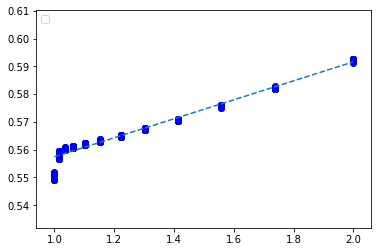

In [263]:
m2, dm2, b2, db2 = plot_data(x=x, y=y)

In [264]:
P = lambda csc_angle: m2*csc_angle + b2

In [265]:
P(csc_angle=2.0)

0.5916127369541417

In [271]:
T_cmb = f_inverse(P=b2)

In [272]:
T_cmb

-1.7826223163174089

In [273]:
k = b2-b1
dk = (db1**2+db2**2)**0.5
q = k/m1
dq = ((dk/k)**2 + (dm1/m1)**2)**0.5

In [277]:
print(T_cmb, " +- ", q*dq)

-1.7826223163174089  +-  -18.456799034552155


No handles with labels found to put in legend.


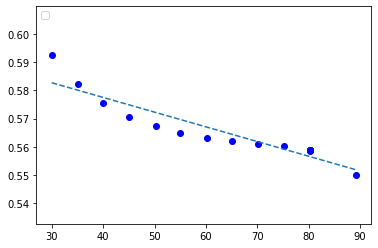

In [168]:
m, b, r_sq = plot_angle(datasets["skydip"]["data"][0])

No handles with labels found to put in legend.


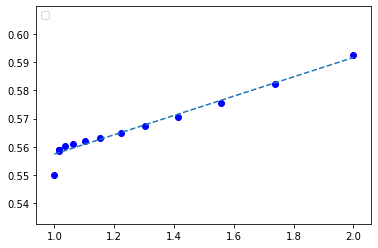

In [209]:
m, b, r_sq = plot_angle(datasets["skydip"]["data"][0], transform=True)